In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/1januarynew.csv', header=0, sep=',')

In [26]:
df.head()

,pickup_datetime,pickup_latitude,pickup_longitude,trip_distance,passenger_count,dropoff_datetime,dropoff_latitude,dropoff_longitude,fare_amount,tolls_amount,taxes_amount,tip_amount,payment_amount,payment_type,pickup_neighborhood,dropoff_neighborhood
0,2016-01-01 00:00:00,40.73470,-73.99037,1.10,2,2016-01-01 00:00:00,40.73241,-73.98184,7.5,0.0,1.3,0.0,8.8,2,Greenwich Village,Gramercy
1,2016-01-01 00:00:00,40.72991,-73.98078,4.90,5,2016-01-01 00:00:00,40.71668,-73.94447,18.0,0.0,1.3,0.0,19.3,1,East Village,NaN
2,2016-01-01 00:00:00,40.67957,-73.98455,10.54,1,2016-01-01 00:00:00,40.78893,-73.95027,33.0,0.0,1.3,0.0,34.3,1,Boerum Hill,Yorkville
3,2016-01-01 00:00:00,40.71899,-73.99347,4.75,1,2016-01-01 00:00:00,40.65733,-73.96224,16.5,0.0,0.8,0.0,17.3,2,Lower East Side,NaN
4,2016-01-01 00:00:00,40.78133,-73.96062,1.76,3,2016-01-01 00:00:00,40.75851,-73.97726,8.0,0.0,0.8,0.0,8.8,2,Upper East Side,Midtown


In [27]:
boxes = pd.read_csv('boxes.txt')

In [4]:
# centerLat : 40.758896,
#	centerLng : -73.985130,
#	maxLat : 40.882214, # north_lat
#	minLat : 40.680396,# sotuh_lat
#maxLng : -74.047285,  # west_long
#	minLng : -73.907000 # east_longitude

In [5]:
# 	40.72855	-73.98164 manhattan
# 40.75820	-73.99234 no manhattan

In [28]:
def insideManhattan(x):
    lat =  x['pickup_latitude']
    long = x['pickup_longitude']
    if ((lat > 40.680396 and lat <40.882214) and (long > -74.047285 and long < -73.907000)):
        return True
    return False

In [29]:
df2 = df.head(50000) #
#df2 = df

In [30]:
df2.head()

,pickup_datetime,pickup_latitude,pickup_longitude,trip_distance,passenger_count,dropoff_datetime,dropoff_latitude,dropoff_longitude,fare_amount,tolls_amount,taxes_amount,tip_amount,payment_amount,payment_type,pickup_neighborhood,dropoff_neighborhood
0,2016-01-01 00:00:00,40.73470,-73.99037,1.10,2,2016-01-01 00:00:00,40.73241,-73.98184,7.5,0.0,1.3,0.0,8.8,2,Greenwich Village,Gramercy
1,2016-01-01 00:00:00,40.72991,-73.98078,4.90,5,2016-01-01 00:00:00,40.71668,-73.94447,18.0,0.0,1.3,0.0,19.3,1,East Village,NaN
2,2016-01-01 00:00:00,40.67957,-73.98455,10.54,1,2016-01-01 00:00:00,40.78893,-73.95027,33.0,0.0,1.3,0.0,34.3,1,Boerum Hill,Yorkville
3,2016-01-01 00:00:00,40.71899,-73.99347,4.75,1,2016-01-01 00:00:00,40.65733,-73.96224,16.5,0.0,0.8,0.0,17.3,2,Lower East Side,NaN
4,2016-01-01 00:00:00,40.78133,-73.96062,1.76,3,2016-01-01 00:00:00,40.75851,-73.97726,8.0,0.0,0.8,0.0,8.8,2,Upper East Side,Midtown


In [31]:
## filtrar solo los pickups de Manhattan
df2 = df2[df2.apply(insideManhattan, axis=1)]
df2.reset_index(inplace=True)

In [32]:
boxes_dump = boxes

In [33]:
boxes_dump['dump'] = 0

In [34]:
boxes_dump.head()

,north_latitude,south_latitude,west_longitud,east_longitude,center_lat,center_long,dump
0,40.882214,40.820555,-73.946065,-73.985130,40.851385,-73.965598,0
1,40.882214,40.820555,-73.907000,-73.946065,40.851385,-73.926533,0
2,40.820555,40.758896,-73.946065,-73.985130,40.789726,-73.965598,0
3,40.820555,40.758896,-73.907000,-73.946065,40.789726,-73.926533,0
4,40.882214,40.820555,-74.016208,-74.047285,40.851385,-74.031746,0


In [35]:
def dumpBoxes(x):
    lat =  x['pickup_latitude']
    long = x['pickup_longitude']
    tmp = boxes[((lat > boxes['south_latitude']) & (lat < boxes['north_latitude'])) & ((long < boxes['west_longitud']) & (long > boxes['east_longitude']))]
    try:
        if (tmp.shape[0] == 1):
            boxes_dump.iloc[tmp.index[0], boxes_dump.columns.get_loc('dump')] = boxes_dump.iloc[tmp.index[0], boxes_dump.columns.get_loc('dump')] + 1
    except:
        print('error')

In [36]:
%%capture
df2.apply(dumpBoxes, axis=1)

In [37]:
boxes_dump

,north_latitude,south_latitude,west_longitud,east_longitude,center_lat,center_long,dump
0,40.882214,40.820555,-73.946065,-73.985130,40.851385,-73.965598,208
1,40.882214,40.820555,-73.907000,-73.946065,40.851385,-73.926533,504
2,40.820555,40.758896,-73.946065,-73.985130,40.789726,-73.965598,14868
3,40.820555,40.758896,-73.907000,-73.946065,40.789726,-73.926533,1344
4,40.882214,40.820555,-74.016208,-74.047285,40.851385,-74.031746,0
5,40.882214,40.820555,-73.985130,-74.016208,40.851385,-74.000669,1
6,40.820555,40.758896,-74.016208,-74.047285,40.789726,-74.031746,4
7,40.820555,40.758896,-73.985130,-74.016208,40.789726,-74.000669,2422
8,40.758896,40.719646,-73.946065,-73.985130,40.739271,-73.965598,9426
9,40.758896,40.719646,-73.907000,-73.946065,40.739271,-73.926533,420


In [87]:
boxes[((lat > boxes['south_latitude']) & (lat < boxes['north_latitude'])) & ((long < boxes['west_longitud']) & (long > boxes['east_longitude']))].index[0]

2

In [135]:
import folium
map_osm = folium.Map(location=[40.78306041, -73.97124880000001],zoom_start=11)
for i in range(0,boxes_dump.shape[0]):
    folium.CircleMarker(location=[boxes_dump.iloc[i]['center_lat'], boxes_dump.iloc[i]['center_long'] ], radius=25,popup=str(boxes_dump.iloc[i]['dump'])).add_to(map_osm)
# folium.PolyLine([40.882214,-73.946065], color="blue", weight=9, opacity=0).add_to(map_osm)
map_osm

In [94]:
import vincent
vincent.core.initialize_notebook()

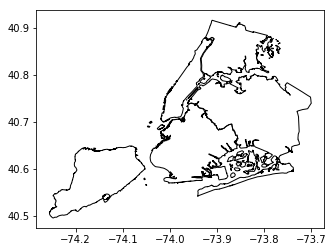

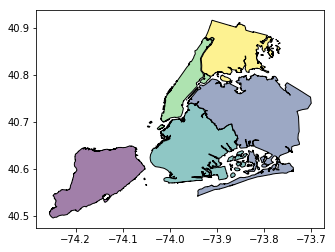

In [134]:
%matplotlib inline
import geopandas as gpd
import geoplot as gplt
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.set_aspect('equal')
# plt.figure(figsize=(50,50))
usa = gpd.read_file("boroughs.geojson")
usa.plot(ax=ax, color='white')
# cities.plot(ax=ax, marker='o', color='red', markersize=5)
usa.plot()